<a href="https://colab.research.google.com/github/daKeshra7/pokemon_dataset/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pokemon Dataset**

The Pokémon dataset provides detailed information on various Pokémon species, including their bio data.

##### **Importing necessary modules and functions**

In [6]:
#importing libraries
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The data contains all generations of the Pokemon series

In [5]:
#Loading dataset to dataframe
url = "https://drive.google.com/file/d/1ejYwA3KV21JdIVBbMbF8f_uze4SrtKcf/view?usp=sharing"
file_id  = "https://drive.google.com/uc?id=" + url.split('/')[-2]

pokemon = pd.read_csv(file_id)

#preview the first 5 rows
pokemon.head()

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


the column "Unnamed: 0" is a duplicate index and will be removed

In [7]:
#checking for null values
pokemon.isna().sum()

Unnamed: 0      0
image_url       0
Id              0
Names           0
Type1           0
Type2         542
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
dtype: int64

there are 542 null values in the Type2 column. The values will be dropped since it is just the secondary column of the dataset

In [8]:
#Checking info about the dataset
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1194 non-null   int64 
 1   image_url   1194 non-null   object
 2   Id          1194 non-null   int64 
 3   Names       1194 non-null   object
 4   Type1       1194 non-null   object
 5   Type2       652 non-null    object
 6   Total       1194 non-null   int64 
 7   HP          1194 non-null   int64 
 8   Attack      1194 non-null   int64 
 9   Defense     1194 non-null   int64 
 10  Sp. Atk     1194 non-null   int64 
 11  Sp. Def     1194 non-null   int64 
 12  Speed       1194 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 121.4+ KB


from the above info output, some columns like Type1,HP will be renamed for easy self description. while columns like (Sp. Atk, Sp. Def) will be renamed to remove spaces.

**Use describe to view basic statistical information about the dataset**

In [9]:
pokemon.describe()

,Unnamed: 0,Id,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,596.500000,492.746231,441.206868,70.883585,80.948911,74.587102,72.881072,72.123953,69.782245
std,344.822418,293.719541,121.015326,26.861740,32.126164,30.678626,32.702411,27.628412,30.200828
min,0.000000,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,298.250000,235.250000,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000
50%,596.500000,486.500000,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,894.750000,741.750000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000
max,1193.000000,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


<Axes: >

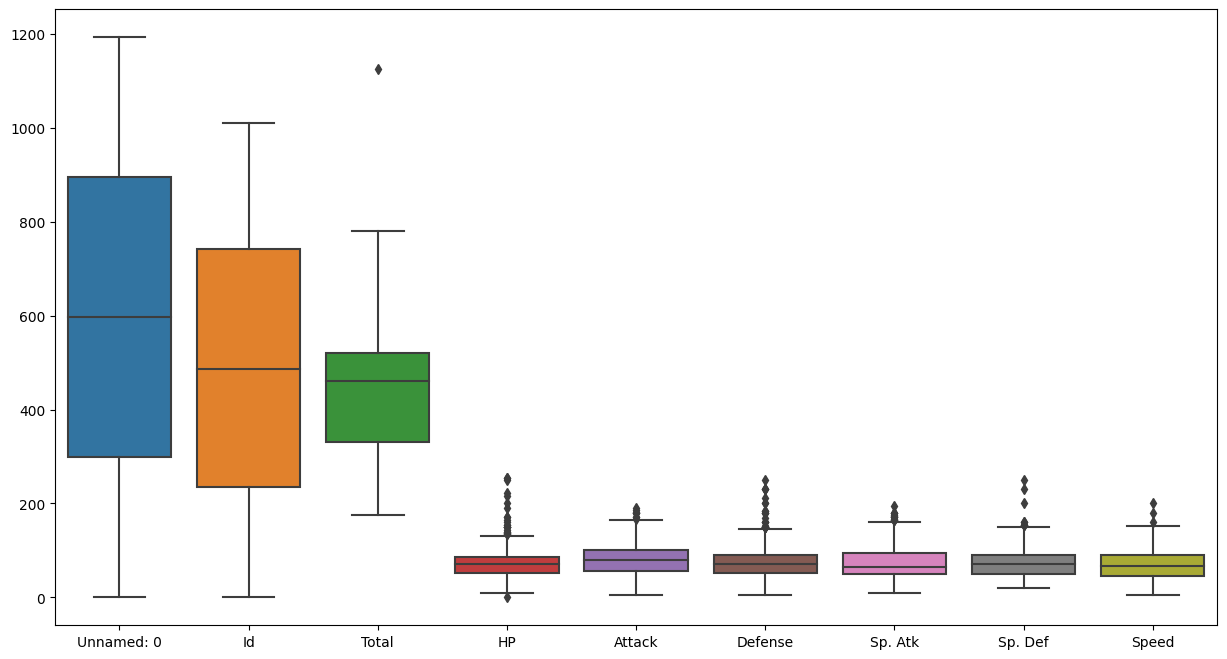

In [10]:
#Plot a boxplot to see the outliers in the dataset
plt.figure(figsize=(15,8))
sns.boxplot(data=pokemon)

There many values considered as outliers for each variable. We will decide to use the total column since it is the culmination of all their stats. The outlier in the total point will be removed from the dataset

# **Data Cleaning and Transformation**

> removing the outlier

In [11]:
pokemon_df = pokemon[pokemon['Total'] < 1125]
pokemon_df

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1189,https://img.pokemondb.net/sprites/scarlet-viol...,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116
1190,1190,https://img.pokemondb.net/sprites/scarlet-viol...,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135
1191,1191,https://img.pokemondb.net/sprites/scarlet-viol...,1008,Miraidon,Electric,Dragon,670,100,85,100,135,115,135
1192,1192,https://img.pokemondb.net/sprites/scarlet-viol...,1009,Walking Wake,Water,Dragon,590,99,83,91,125,83,109


> drop "Unnamed: 0"  and "Type2" column

In [12]:
# drop duplicate index column and null column
pokemon_df.drop(columns=['Unnamed: 0', 'Type2'], inplace=True)

<ipython-input-12-b407b775d03a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_df.drop(columns=['Unnamed: 0', 'Type2'], inplace=True)


**Renaming columns**
> Type1 - primary_type

> HP - hitpoint

> Sp. Atk: special_attack

> Sp. Def: special_defense

convert all column names to lower case

In [13]:
pokemon_df.rename(columns={
    'Type1': 'primary_type',
    'HP': 'hit_point',
    'Sp. Atk': 'special_attack',
    'Sp. Def': 'special_defense'}, inplace=True)

<ipython-input-13-62ca4133343b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_df.rename(columns={


In [14]:
#convert all column names to lowercase
pokemon_df.columns = pokemon_df.columns.str.lower()

In [15]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 1193
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_url        1193 non-null   object
 1   id               1193 non-null   int64 
 2   names            1193 non-null   object
 3   primary_type     1193 non-null   object
 4   total            1193 non-null   int64 
 5   hit_point        1193 non-null   int64 
 6   attack           1193 non-null   int64 
 7   defense          1193 non-null   int64 
 8   special_attack   1193 non-null   int64 
 9   special_defense  1193 non-null   int64 
 10  speed            1193 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 111.8+ KB


In [16]:
#Preview  10 random rows to see if changes have been implemented
pokemon_df.sample(10)

,image_url,id,names,primary_type,total,hit_point,attack,defense,special_attack,special_defense,speed
545,https://img.pokemondb.net/sprites/sword-shield...,445,Garchomp Mega Garchomp,Dragon,700,108,170,115,120,95,92
696,https://img.pokemondb.net/sprites/sword-shield...,572,Minccino,Normal,300,55,50,40,40,40,75
274,https://img.pokemondb.net/sprites/sword-shield...,214,Heracross Mega Heracross,Bug,600,80,185,115,40,105,75
705,https://img.pokemondb.net/sprites/sword-shield...,581,Swanna,Water,473,75,87,63,87,63,98
443,https://img.pokemondb.net/sprites/sword-shield...,360,Wynaut,Psychic,260,95,23,48,23,48,23
373,https://img.pokemondb.net/sprites/sword-shield...,302,Sableye Mega Sableye,Dark,480,50,85,125,85,115,20
967,https://img.pokemondb.net/sprites/sword-shield...,806,Blacephalon,Fire,570,53,127,53,151,79,107
492,https://img.pokemondb.net/sprites/sword-shield...,398,Staraptor,Normal,485,85,120,70,50,60,100
1061,https://img.pokemondb.net/sprites/sword-shield...,892,Urshifu Rapid Strike Style,Fighting,550,100,130,100,63,60,97
954,https://img.pokemondb.net/sprites/sword-shield...,796,Xurkitree,Electric,570,83,89,71,173,71,83


# **Data Insight and Analysis**

### Explaining variables in the Pokemon dataset

The dataset contains the name and stats of all available Pokemon. There are 12 columns and 1194 rows in the dataset and each variable is explained below:
> image_url: This is link to the image/sprite of the Pokemon

> Id: The represents the global Identifier of each Pokemon (The ID represents thesame Pokemon all over the world).

> names: The name of each Pokemon.Each name is unique to each Pokemon.

> primary_type: The primary type of a Pokemon

> total: This is the total of all stats of a Pokemon

> hit_point: is the total number of hits/damage a Pokemon can receive before it can be destroyed.

> attack: the offensive ability of the Pokemon

> defense: the degree of resistance of the Pokemon to attack

> special_attack: is the base stat that determines the special power of a Pokemon

> special_defense: is the base stat that determinse how much a Pokemon can withstand a special attack

> speed: this determines how fast a Pokemon is.

**additional columns**

> defense_strength: gotten by adding each Pokemon's defense ability like; defense, special defense and hit point

> attack_strength: gotten by adding each Pokemon's attack ability like; attack and special attack

There few questions to be answered in this section. Questions like;

> variable definition

> highest number of Pokemon by primary type

> Which are the top 10 defense pokemon?

> Which are the top 10 attack pokemon?

> Top 10 Pokemons by overall stats

> Worst pokemon in terms of defense

> Worst Pokemon in terms of attack

> Comparison between best and worst pokemon(corr graph)

**The highest number of Pokemon's by primary type**

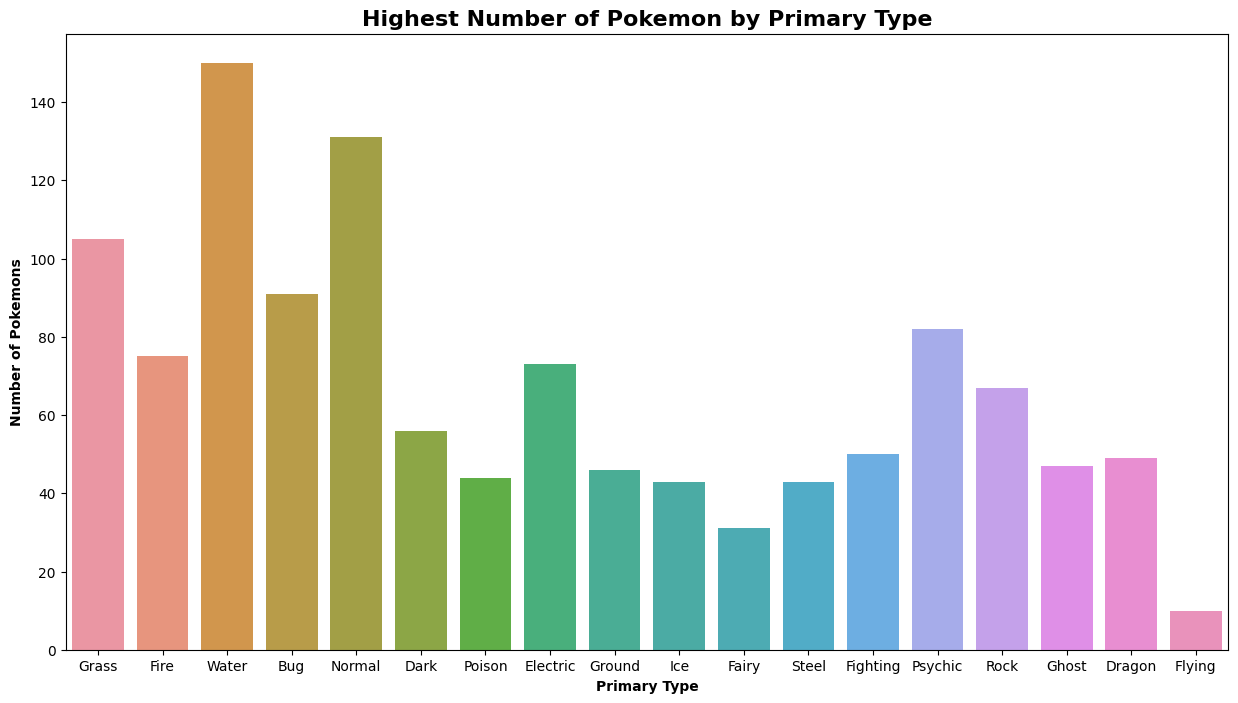

In [17]:
#Set the chart size
plt.figure(figsize=(15,8))

#Plot chart
sns.countplot(data=pokemon_df, x='primary_type') #, palette=[]

#Set the chart title
plt.title('Highest Number of Pokemon by Primary Type', fontsize=16, weight="bold")

#set the x and y label
plt.xlabel('Primary Type', fontsize=10, weight="bold")
plt.ylabel('Number of Pokemons', fontsize=10, weight="bold")

#show the plot
plt.show()

**Top 10 Defense Pokemon**

A new column named defense strength which is the addition of hit point, special defense and their defense ability

In [18]:
pokemon_df["defense_strength"] = pokemon_df['hit_point'] + pokemon_df["defense"] + pokemon_df["special_defense"]
pokemon_df.head()

<ipython-input-18-2ceb0d175196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_df["defense_strength"] = pokemon_df['hit_point'] + pokemon_df["defense"] + pokemon_df["special_defense"]


,image_url,id,names,primary_type,total,hit_point,attack,defense,special_attack,special_defense,speed,defense_strength
0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,318,45,49,49,65,65,45,159
1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,405,60,62,63,80,80,60,203
2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,525,80,82,83,100,100,80,263
3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,625,80,100,123,122,120,80,323
4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,309,39,52,43,60,50,65,132


In [19]:
#creating a table of top 10 pokemon by defense
top_10_defense = pokemon_df.sort_values(by='defense_strength', ascending=False).head(10)

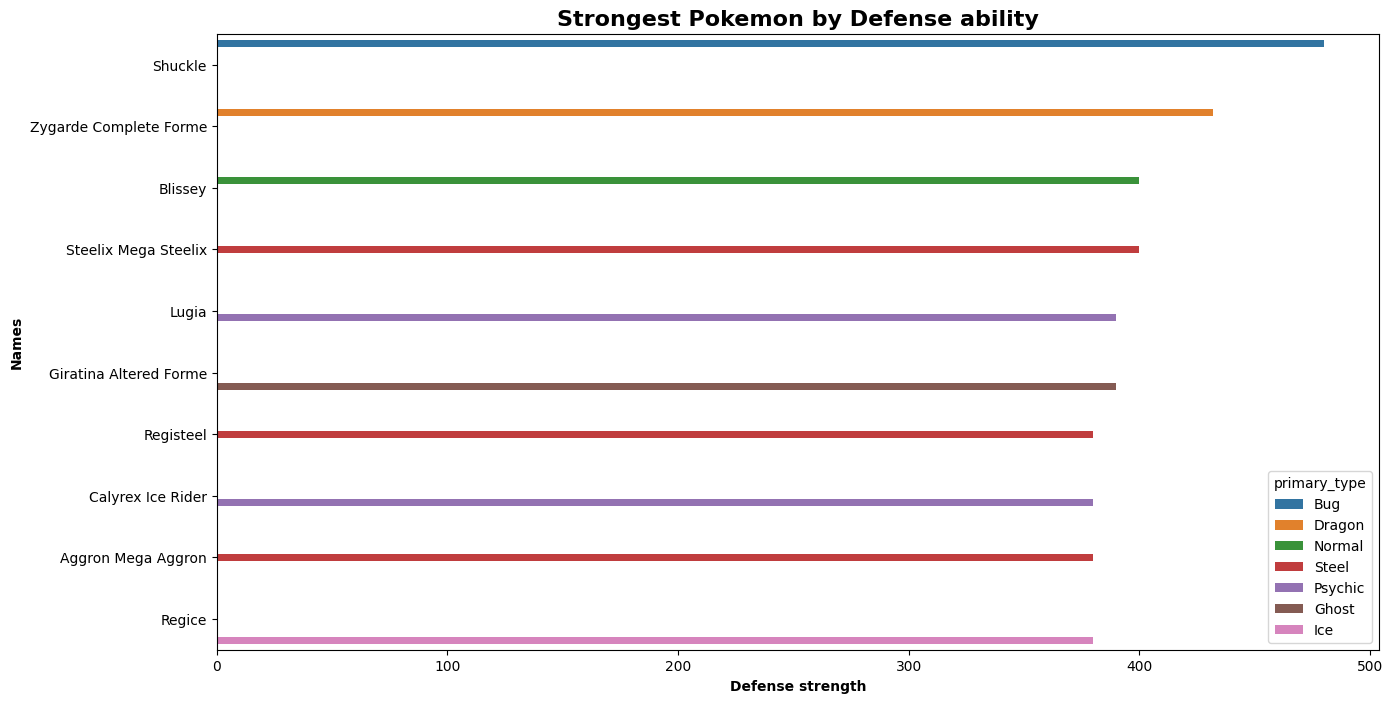

In [20]:
#top 10 defense barplot
#Set the chart size
plt.figure(figsize=(15,8))

#Plot chart
sns.barplot(data=top_10_defense, x='defense_strength', y='names', hue='primary_type') #, palette=[]

#Set the chart title
plt.title('Strongest Pokemon by Defense ability', fontsize=16, weight="bold")

#set the x and y label
plt.xlabel('Defense strength', fontsize=10, weight="bold")
plt.ylabel('Names', fontsize=10, weight="bold")

# plt.xticks(pokemon.names)

#show the plot
plt.show()

**Top 10 attack Pokemon**

Applying thesame technique, the attack and special attack ability will be added together to plot the attack strength

In [21]:
pokemon_df['attack_strength'] = pokemon_df['attack'] + pokemon_df['special_attack']

<ipython-input-21-b6c654677d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_df['attack_strength'] = pokemon_df['attack'] + pokemon_df['special_attack']


In [22]:
pokemon_df.attack_strength

0       114
1       142
2       182
3       222
4       112
       ... 
1189    250
1190    220
1191    220
1192    208
1193    200
Name: attack_strength, Length: 1193, dtype: int64

In [23]:
#creating tablefor top 10 attack by attack strength
top_10_attack = pokemon_df.sort_values(by='attack_strength', ascending=False).head(10)
top_10_attack

,image_url,id,names,primary_type,total,hit_point,attack,defense,special_attack,special_defense,speed,defense_strength,attack_strength
478,https://img.pokemondb.net/sprites/sword-shield...,386,Deoxys Attack Forme,Psychic,600,50,180,20,180,20,150,90,360
475,https://img.pokemondb.net/sprites/sword-shield...,384,Rayquaza Mega Rayquaza,Dragon,780,105,180,100,180,100,115,305,360
201,https://img.pokemondb.net/sprites/sword-shield...,150,Mewtwo Mega Mewtwo X,Psychic,780,106,190,100,154,100,130,306,344
202,https://img.pokemondb.net/sprites/sword-shield...,150,Mewtwo Mega Mewtwo Y,Psychic,780,106,150,70,194,120,140,296,344
961,https://img.pokemondb.net/sprites/sword-shield...,800,Necrozma Ultra Necrozma,Psychic,754,97,167,97,167,97,129,291,334
473,https://img.pokemondb.net/sprites/sword-shield...,383,Groudon Primal Groudon,Ground,770,100,180,160,150,90,90,350,330
471,https://img.pokemondb.net/sprites/sword-shield...,382,Kyogre Primal Kyogre,Water,770,100,150,90,180,160,90,350,330
869,https://img.pokemondb.net/sprites/sword-shield...,720,Hoopa Hoopa Unbound,Psychic,680,80,160,60,170,130,80,270,330
867,https://img.pokemondb.net/sprites/sword-shield...,719,Diancie Mega Diancie,Rock,700,50,160,110,160,110,110,270,320
474,https://img.pokemondb.net/sprites/sword-shield...,384,Rayquaza,Dragon,680,105,150,90,150,90,95,285,300


Plotting chart for Pokemons by attack strength

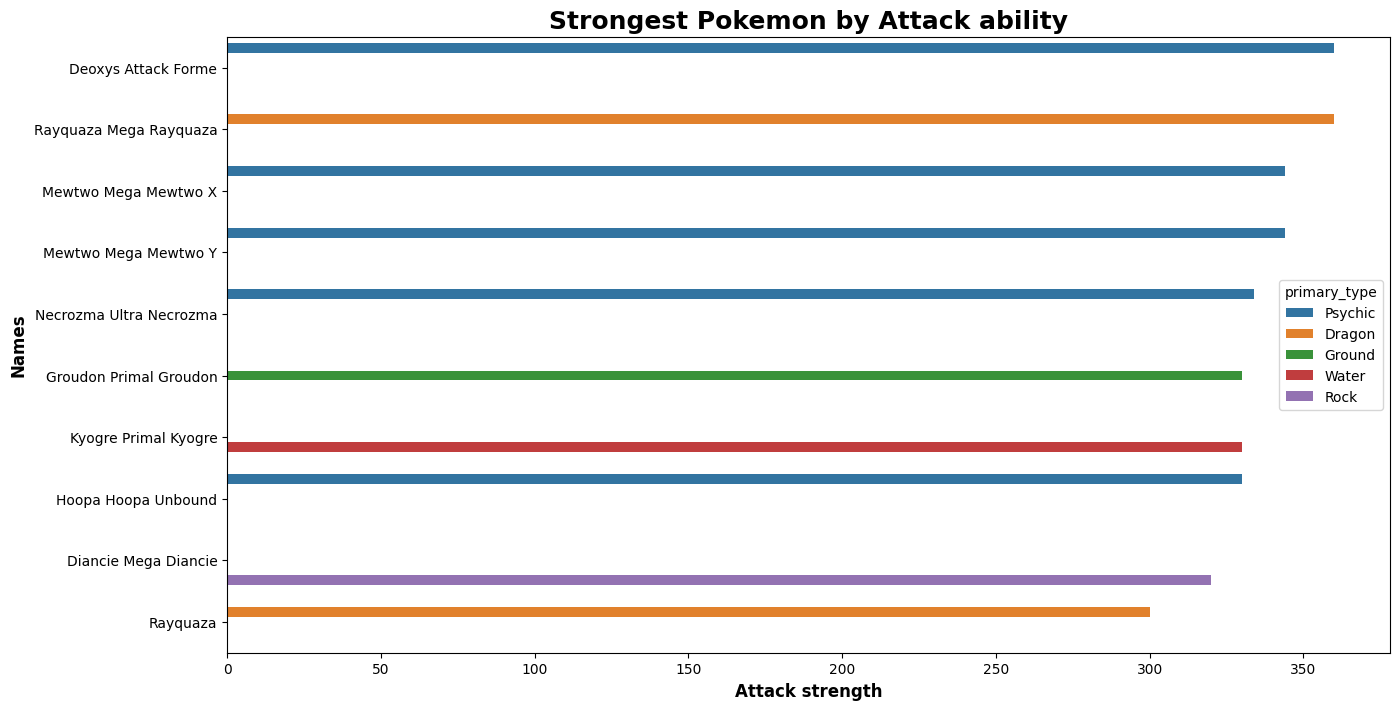

In [24]:
#top 10 Attack barplot
#Set the chart size
plt.figure(figsize=(15,8))

#Plot chart
sns.barplot(data=top_10_attack, x='attack_strength', y='names', hue='primary_type') #, palette=[]

#Set the chart title
plt.title('Strongest Pokemon by Attack ability', fontsize=18, weight="bold")

#set the x and y label
plt.xlabel('Attack strength', fontsize=12, weight="bold")
plt.ylabel('Names', fontsize=12, weight="bold")

# plt.xticks(pokemon.names)

#show the plot
plt.show()

**Top 10 Pokemon by overall stats**


In [25]:
#sort totalvalues from highest to lowest
sort_total = pokemon_df.sort_values(by='total',ascending=False).head(10)
sort_total

,image_url,id,names,primary_type,total,hit_point,attack,defense,special_attack,special_defense,speed,defense_strength,attack_strength
475,https://img.pokemondb.net/sprites/sword-shield...,384,Rayquaza Mega Rayquaza,Dragon,780,105,180,100,180,100,115,305,360
202,https://img.pokemondb.net/sprites/sword-shield...,150,Mewtwo Mega Mewtwo Y,Psychic,780,106,150,70,194,120,140,296,344
201,https://img.pokemondb.net/sprites/sword-shield...,150,Mewtwo Mega Mewtwo X,Psychic,780,106,190,100,154,100,130,306,344
473,https://img.pokemondb.net/sprites/sword-shield...,383,Groudon Primal Groudon,Ground,770,100,180,160,150,90,90,350,330
471,https://img.pokemondb.net/sprites/sword-shield...,382,Kyogre Primal Kyogre,Water,770,100,150,90,180,160,90,350,330
961,https://img.pokemondb.net/sprites/sword-shield...,800,Necrozma Ultra Necrozma,Psychic,754,97,167,97,167,97,129,291,334
605,https://img.pokemondb.net/sprites/sword-shield...,493,Arceus,Normal,720,120,120,120,120,120,120,360,240
865,https://img.pokemondb.net/sprites/sword-shield...,718,Zygarde Complete Forme,Dragon,708,216,100,121,91,95,85,432,191
458,https://img.pokemondb.net/sprites/sword-shield...,373,Salamence Mega Salamence,Dragon,700,95,145,130,120,90,120,315,265
312,https://img.pokemondb.net/sprites/sword-shield...,248,Tyranitar Mega Tyranitar,Rock,700,100,164,150,95,120,71,370,259


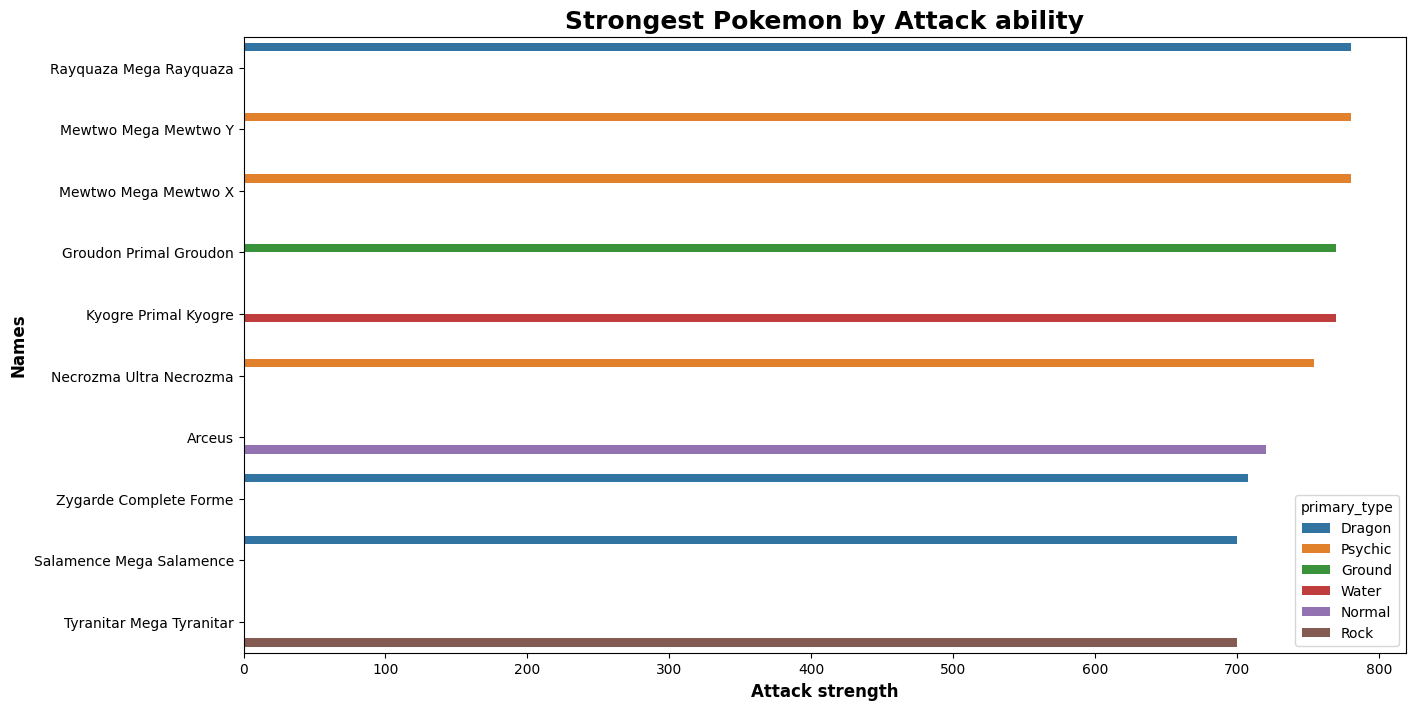

In [26]:
#Plottin chart of top 10 Pokemons by Total stats
#top 10 Attack barplot
#Set the chart size
plt.figure(figsize=(15,8))

#Plot chart
sns.barplot(data=sort_total, x='total', y='names', hue='primary_type')

#Set the chart title
plt.title('Strongest Pokemon by Attack ability', fontsize=18, weight="bold")

#set the x and y label
plt.xlabel('Attack strength', fontsize=12, weight="bold")
plt.ylabel('Names', fontsize=12, weight="bold")

# plt.xticks(pokemon.names)

#show the plot
plt.show()

**Top 10 worst Pokemon in terms of defense**

In [28]:
worst_defence =  pokemon_df.sort_values(by='defense_strength',ascending=True).head(10)
worst_defence

,image_url,id,names,primary_type,total,hit_point,attack,defense,special_attack,special_defense,speed,defense_strength,attack_strength
1138,https://img.pokemondb.net/sprites/scarlet-viol...,960,Wiglett,Water,245,10,55,25,35,25,95,60,90
225,https://img.pokemondb.net/sprites/sword-shield...,172,Pichu,Electric,205,20,40,15,35,35,60,70,75
362,https://img.pokemondb.net/sprites/sword-shield...,292,Shedinja,Bug,236,1,90,45,30,30,40,76,120
63,https://img.pokemondb.net/sprites/sword-shield...,50,Diglett,Ground,265,10,55,25,35,45,95,80,90
64,https://img.pokemondb.net/sprites/sword-shield...,50,Diglett Alolan Diglett,Ground,265,10,55,30,35,45,90,85,90
393,https://img.pokemondb.net/sprites/sword-shield...,318,Carvanha,Water,305,45,90,20,65,20,65,85,155
1050,https://img.pokemondb.net/sprites/sword-shield...,885,Dreepy,Dragon,270,28,60,30,40,30,82,88,100
349,https://img.pokemondb.net/sprites/sword-shield...,280,Ralts,Psychic,198,28,25,25,45,35,40,88,70
902,https://img.pokemondb.net/sprites/sword-shield...,746,Wishiwashi Solo Form,Water,175,45,20,20,25,25,40,90,45
478,https://img.pokemondb.net/sprites/sword-shield...,386,Deoxys Attack Forme,Psychic,600,50,180,20,180,20,150,90,360


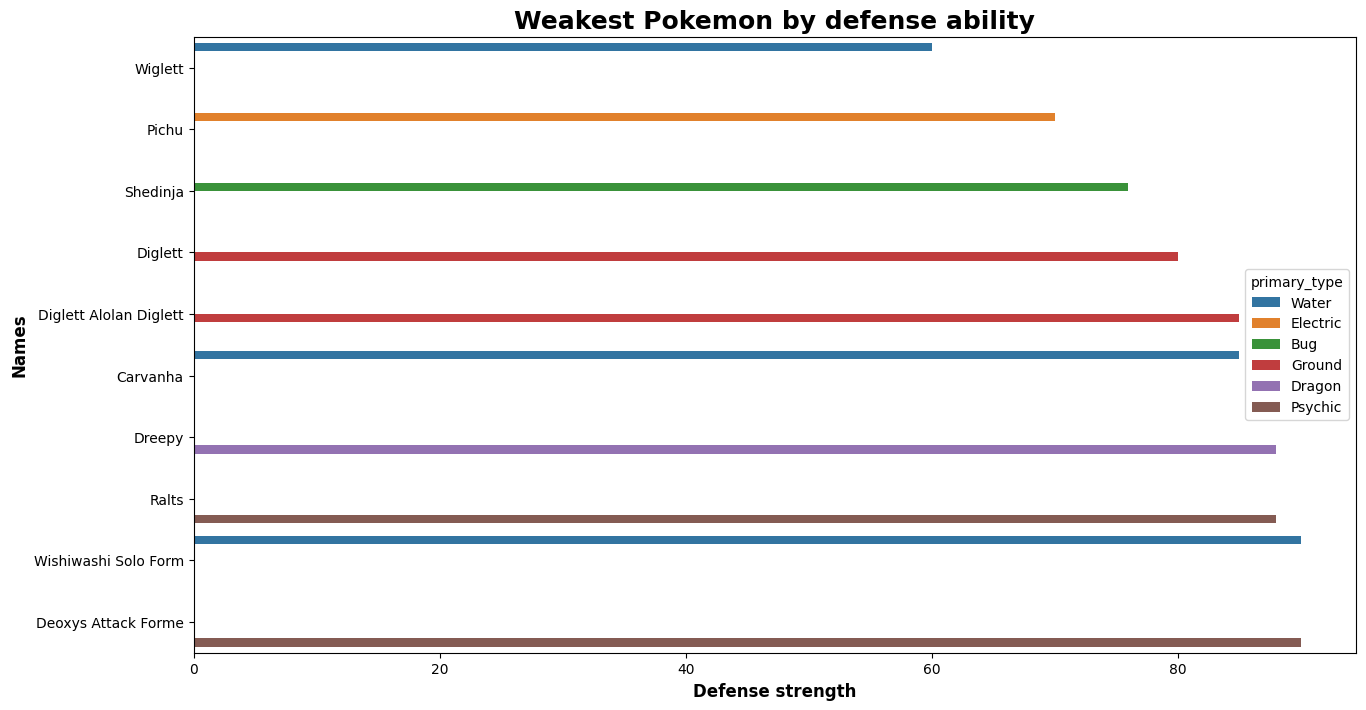

In [32]:
#Plottin chart of top 10 weakest Pokemons

#Set the chart size
plt.figure(figsize=(15,8))

#Plot chart
sns.barplot(data=worst_defence, x='defense_strength', y='names', hue='primary_type')

#Set the chart title
plt.title('Weakest Pokemon by defense ability', fontsize=18, weight="bold")

#set the x and y label
plt.xlabel('Defense strength', fontsize=12, weight="bold")
plt.ylabel('Names', fontsize=12, weight="bold")

#show the plot
plt.show()

**Top 10 worst Pokemon in terms of Attack**

In [38]:
weak_attack  = pokemon_df.sort_values(by='attack_strength',ascending=True).head(10)
weak_attack

,image_url,id,names,primary_type,total,hit_point,attack,defense,special_attack,special_defense,speed,defense_strength,attack_strength
539,https://img.pokemondb.net/sprites/sword-shield...,440,Happiny,Normal,220,100,5,5,15,65,30,170,20
272,https://img.pokemondb.net/sprites/sword-shield...,213,Shuckle,Bug,505,20,10,230,10,230,5,480,20
427,https://img.pokemondb.net/sprites/sword-shield...,349,Feebas,Water,200,20,15,20,10,55,80,95,25
173,https://img.pokemondb.net/sprites/sword-shield...,129,Magikarp,Water,200,20,10,55,15,20,80,95,25
151,https://img.pokemondb.net/sprites/sword-shield...,113,Chansey,Normal,450,250,5,5,35,105,50,360,40
368,https://img.pokemondb.net/sprites/sword-shield...,298,Azurill,Normal,190,50,20,40,20,40,20,130,40
237,https://img.pokemondb.net/sprites/sword-shield...,183,Marill,Water,250,70,20,50,20,50,40,170,40
298,https://img.pokemondb.net/sprites/sword-shield...,235,Smeargle,Normal,250,55,20,35,20,45,75,135,40
985,https://img.pokemondb.net/sprites/sword-shield...,824,Blipbug,Bug,180,25,20,20,25,45,45,90,45
902,https://img.pokemondb.net/sprites/sword-shield...,746,Wishiwashi Solo Form,Water,175,45,20,20,25,25,40,90,45


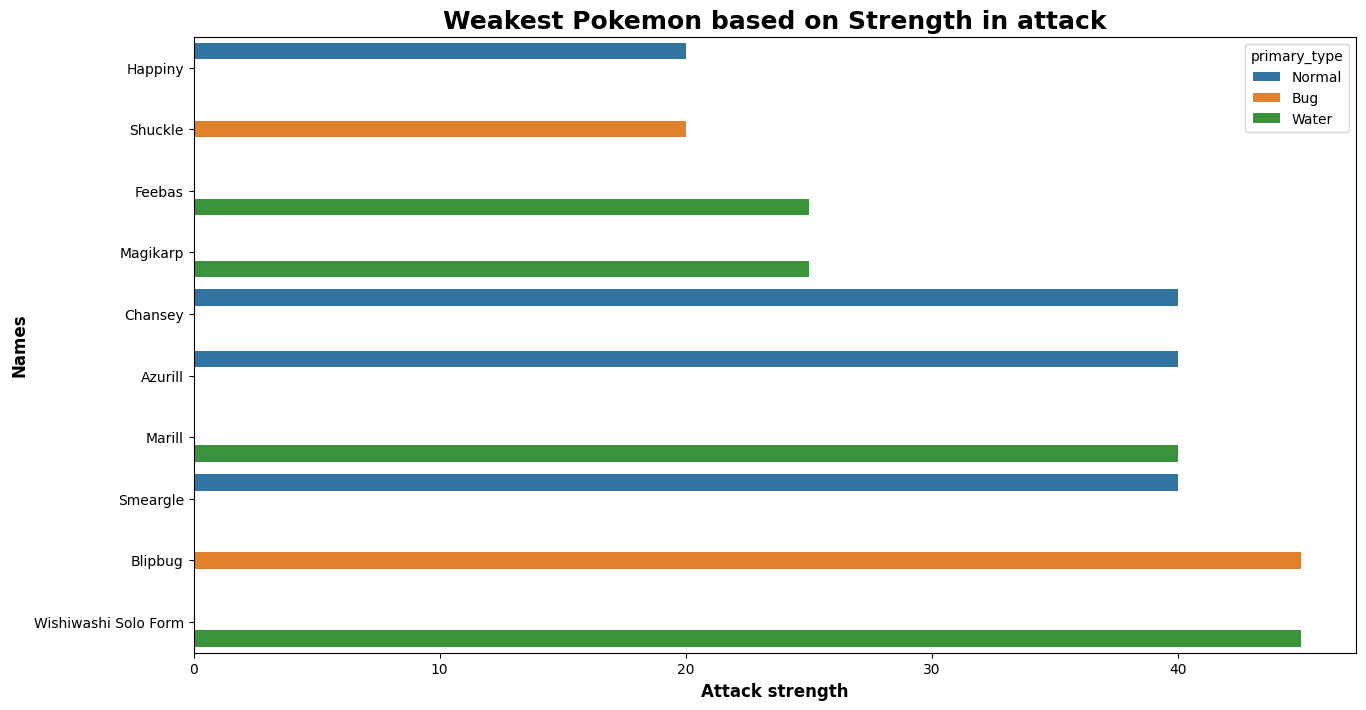

In [39]:
#Plottin chart of top 10 weakst Pokemons based on their strength in attack

#Set the chart size
plt.figure(figsize=(15,8))

#Plot chart
sns.barplot(data=weak_attack, x='attack_strength', y='names', hue='primary_type')

#Set the chart title
plt.title('Weakest Pokemon based on Strength in attack', fontsize=18, weight="bold")

#set the x and y label
plt.xlabel('Attack strength', fontsize=12, weight="bold")
plt.ylabel('Names', fontsize=12, weight="bold")

# plt.xticks(pokemon.names)

#show the plot
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
pd.crosstab(pokemon.type1, pokemon.total, margins=True).plot(kind="boxplot", figsize=(15,8), legend=None)

**Top 10 weakes Pokemon overall**

In [41]:
#sort totalvalues from highest to lowest
weakest_pokemon = pokemon_df.sort_values(by='total',ascending=False).tail(10)
weakest_pokemon

,image_url,id,names,primary_type,total,hit_point,attack,defense,special_attack,special_defense,speed,defense_strength,attack_strength
349,https://img.pokemondb.net/sprites/sword-shield...,280,Ralts,Psychic,198,28,25,25,45,35,40,88,70
334,https://img.pokemondb.net/sprites/sword-shield...,265,Wurmple,Bug,195,45,45,35,20,30,20,110,65
13,https://img.pokemondb.net/sprites/sword-shield...,10,Caterpie,Bug,195,45,30,35,20,20,45,100,50
16,https://img.pokemondb.net/sprites/sword-shield...,13,Weedle,Bug,195,40,35,30,20,20,50,90,55
495,https://img.pokemondb.net/sprites/sword-shield...,401,Kricketot,Bug,194,37,25,41,25,41,25,119,50
368,https://img.pokemondb.net/sprites/sword-shield...,298,Azurill,Normal,190,50,20,40,20,40,20,130,40
1034,https://img.pokemondb.net/sprites/sword-shield...,872,Snom,Ice,185,30,25,35,45,30,20,95,70
245,https://img.pokemondb.net/sprites/sword-shield...,191,Sunkern,Grass,180,30,30,30,30,30,30,90,60
985,https://img.pokemondb.net/sprites/sword-shield...,824,Blipbug,Bug,180,25,20,20,25,45,45,90,45
902,https://img.pokemondb.net/sprites/sword-shield...,746,Wishiwashi Solo Form,Water,175,45,20,20,25,25,40,90,45


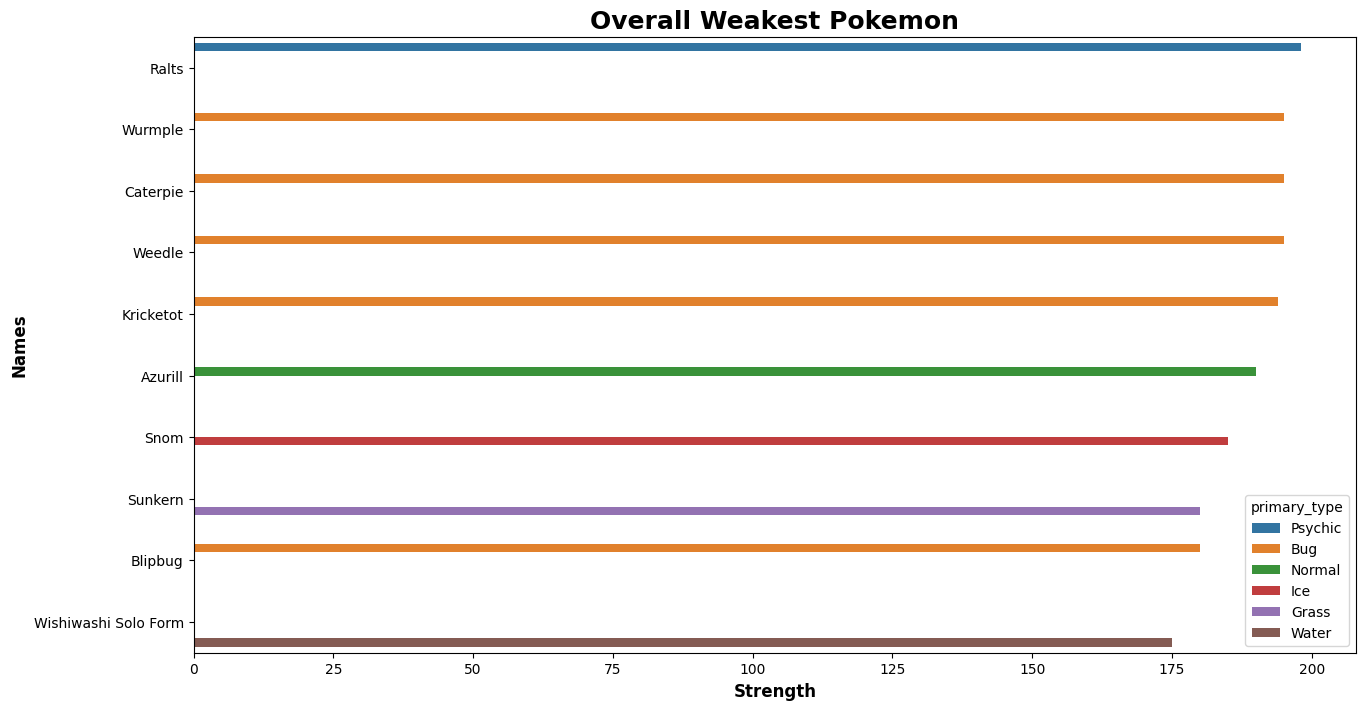

In [43]:
#Plottin chart of top 10 weakset Pokemons overall
#Set the chart size
plt.figure(figsize=(15,8))

#Plot chart
sns.barplot(data=weakest_pokemon, x='total', y='names', hue='primary_type')

#Set the chart title
plt.title('Overall Weakest Pokemon', fontsize=18, weight="bold")

#set the x and y label
plt.xlabel('Strength', fontsize=12, weight="bold")
plt.ylabel('Names', fontsize=12, weight="bold")

# plt.xticks(pokemon.names)

#show the plot
plt.show()